# Model in production

In [1]:
from fastai.imports import *
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import torch
from PIL import Image
import PIL.ImageOps 

In [2]:
arabic_labels = ['alef', 'beh', 'teh', 'theh', 'jeem', 'hah', 'khah', 'dal', 'thal',
                'reh', 'zain', 'seen', 'sheen', 'sad', 'dad', 'tah', 'zah', 'ain', 
                'ghain', 'feh', 'qaf', 'kaf', 'lam', 'meem', 'noon', 'heh', 'waw', 'yeh']
data_path = Path('data')
input_size = 64
batch_size = 32
np.random.seed(13)
tfms = get_transforms(do_flip=False)
s = '([^/\d]+)\d+.jpg$'
data = (ImageList.from_folder(data_path)
        .split_by_folder(train='train', valid='test')
        .label_from_re(s,classes = arabic_labels)
        .transform(tfms,size=input_size)
        .databunch(bs=batch_size, num_workers=0) 
        .normalize(imagenet_stats))

In [3]:
defaults.device = torch.device('cpu')

First thing first, let's export the content of our Learner object for production:

In [30]:
learn = cnn_learner(data,models.resnet50,metrics=[accuracy, error_rate],pretrained=True)

In [31]:
learn = learn.load('AHCR_Resnet-50_final')

This will create a file named 'export.pkl' in the directory where we were working that contains everything we need to deploy our model (the model, the weights but also some metadata like the classes or the transforms/normalization used).

You probably want to use CPU for inference, except at massive scale (and you almost certainly don't need to train in real-time). If you don't have a GPU that happens automatically. You can test your model on CPU like so:


In case the images are not inverted, you can use these lines to do so

In [6]:
#image = Image.open(data_path/'ShowTest'/'03.jpg')
#inverted_image = PIL.ImageOps.invert(image)
#inverted_image.save(data_path/'ShowTest'/'03.png')

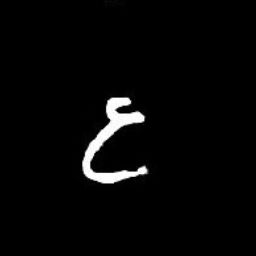

In [40]:
img = open_image(r"D:\Ironhack\Final_Project\ShowTest\18.jpg")
img

We create our Learner in production enviromnent like this, just make sure that path contains the file 'export.pkl' from before.

In [42]:
learn = load_learner(data_path)

In [43]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category jeem